# Simulation of AR(2) process

Note here phi0=0<center> X_t = phi1\*X_(t-1) + phi2\*X_(t-2) + Z_t </center>
<center>Z_t ~ N(0, sigma^2) </center>

In [75]:
set.seed(2017)

model parameters ie population values of phi(s) (we will estimate them)


In [76]:
sigma=4
phi=NULL
phi[1:2]=c(1/3,1/2)
phi

[1] 0.3333333 0.5000000

number of data points:


In [77]:
n=1000

## Simulate AR(2) process

Here we automatically produce a X_t process with mean 0 hence phi0=0 here

In [78]:
ar.process=arima.sim(n,model=list(ar=c(1/3,1/2)), sd=4)

## Plot simulated time series, along with acf, pacf

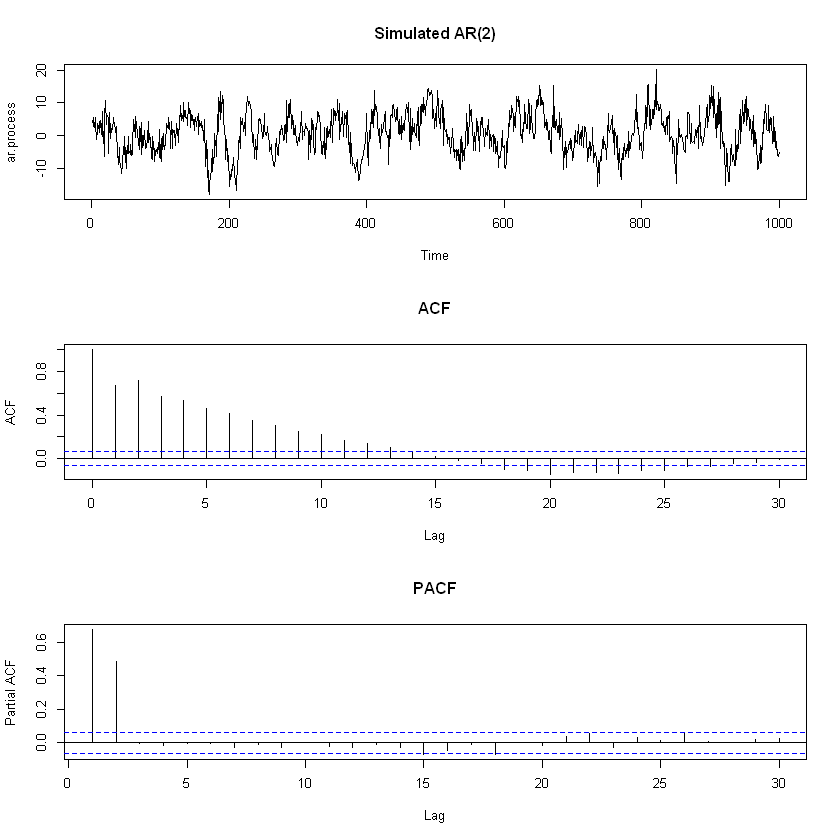

In [79]:
par(mfrow=c(3,1))
plot(ar.process, main='Simulated AR(2)')
acf(ar.process, main='ACF')
pacf(ar.process, main='PACF')

Since we know now from above PACF plot that order of observed simulated AR will be 2, we need only r1 and r2 ACF values.<BR> We find and name 2nd and 3rd sample autocorrelation (First is at lag 0 ie 1)

In [80]:
r=NULL
r[1:2]=acf(ar.process, plot=F)$acf[2:3]
r

[1] 0.6740972 0.7191481

matrix R

In [81]:
R=matrix(1,2,2) # matrix of dimension 2 by 2, with entries all 1's.
R

1,1
1,1


Now edit R::

In [82]:
R[1,2]=r[1] # only diagonal entries are edited
R[2,1]=r[1] # only diagonal entries are edited
R

1.0000000,0.6740972
0.6740972,1.0000000


b-column vector on the right

In [83]:
b=matrix(r,nrow=2,ncol=1)# b- column vector with no entries
b

0.6740972
0.7191481


Solve phi.hat(s) using <br> solve(R,b) solves Rx=b, and gives x=R^(-1)b vector

In [84]:
phi.hat=solve(R,b)
phi.hat

0.3470013
0.4852355


Note the above are close to the population phi values ie 1/3 and 1/2.

## Variance estimation for sigma_Z

In [85]:
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 15.2559

very close to 16 as sd=4 was used in sumilation.